In [1]:
import pandas as pd
import numpy as np

import datetime
import pytz

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go

In [2]:
def draw_barchart(date):
    year = date.date().year
    month = date.date().month
    day = date.date().day
    ax.clear()
    ax.set_xlim([0, data.groupby('artist').size().max()])
    dff = data[data.played_at < datetime.datetime(year, month, day, tzinfo=pytz.UTC)]
    dff = dff.groupby('artist').size().sort_values(ascending=True).tail(10)
    dx = dff.max() / 200
    dff.plot.barh(ax=ax)
    #ax.set_title('songs played by artist at {}-{}'.format(year, month), fontsize=15)
    for i, (name, value) in enumerate(dff.to_frame().reset_index().values):
        ax.text(value, 
                i-.1, 
                name, 
                size=14, 
                weight=600, 
                ha='right', 
                va='bottom',
                c='white')
        ax.text(value+dx, 
                i,     
                f'{value:,.0f}',  
                size=14, 
                ha='left',  
                va='center')
        #ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
        #ax.text(value, i,     value,           ha='left')   # 38194.2: value
    # Add year right middle portion of canvas
    #ax.text(1, 0.4, '{}-{}'.format(month, year), transform=ax.transAxes, size=46, ha='right')
    # ... polished styles
    ax.text(1, 0.4, '{}-{}'.format(month, year), transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Songs played', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    #ax.text(0, 1.12, 'songs played by artist',
    #        transform=ax.transAxes, size=24, weight=600, ha='left')
    #ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
    #        color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    #plt.savefig('./figures/songs_played_by_artist_{}_{}.png'.format(year, month))

In [3]:
tracks = pd.read_csv('../data/processed/tracks.csv', index_col=0)
features = pd.read_csv('../data/processed/track_features.csv', index_col=0)

data = pd.merge(tracks, features, on='id')
data.played_at = pd.to_datetime(data.played_at)
data.sort_values('played_at', inplace=True)
data.reset_index(inplace=True)
del data['index']

In [4]:
frames = pd.date_range(data.played_at.dt.date.min(), 
                       data.played_at.dt.date.max(), 
                       freq='D')[1:]

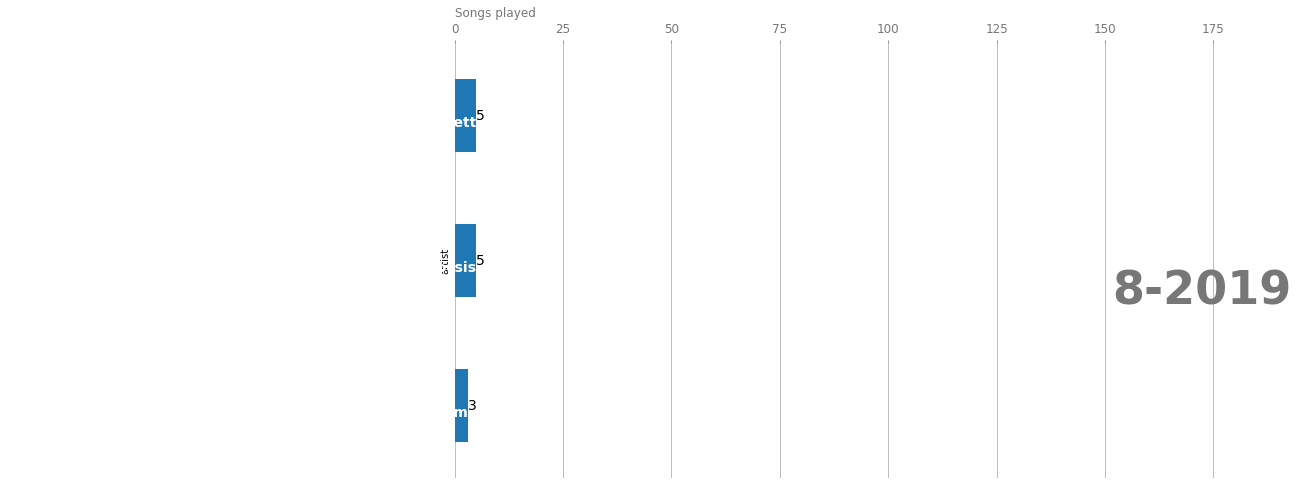

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))


animator = animation.FuncAnimation(fig, 
                                   draw_barchart, 
                                   frames=frames, 
                                   interval=50)
HTML(animator.to_html5_video()) 
animator.save('../figures/songs_played_by_artist_monthly_cumulative.mp4')